# Task

The question is shown as below.

Considering the dynamics equation:

$$
\begin{aligned}
m\ddot{q} + C \text{sign}\dot{q} &= Q(t)\\
Also&:\\
m\ddot{q} + C \frac{\dot{q}}{|q|} &= Q(t)
\end{aligned}
$$

And the desired position is obvious that $q_d = \dot{q_d} = \ddot{q_d} = 0$, so the $Q(t)$ could be represented as:

$$
\begin{aligned}
Q &= K_p(q_d - q) + K_{\tau 1}(\dot{q_d} - \dot{q}) - K_{\tau 2}\dot{q} + Q_f\\
&= -K_p q - K_\tau\dot{q} + Q_f
\end{aligned}
$$

While:

$$
\begin{aligned}
Q_f &= \tilde{m}\ddot{q_d} + \tilde{c}\dot{q_d} + \tilde{C_d}\\
&=\tilde{C_d}
\end{aligned}
$$

So the whole equation is:

$$
m\ddot{q} + C\text{sign}\dot{q} + K_\tau \dot{q} + K_p q = C_d
$$

Obviously that when $\ddot{q}=\dot{q}=q=0$ ,$C_d=0$. So the equation can be represented as:

$$
\begin{aligned}
\begin{cases}
m\ddot{q} + (K_\tau+C) \dot{q} + K_p q &= 0,\dot{q}>0\\
m\ddot{q} + (K_\tau-C)\dot{q} + K_p q &=0,\dot{q}<0\\
m\ddot{q} + K_\tau \dot{q} + K_p q &= 0,\dot{q}=0
\end{cases}
\end{aligned}
$$

Analysis the problem according to classical control theory, to make the system stable and without overshoot, we will have:

$$
\begin{aligned}
K_\tau&>|C|\\
\frac{(\{K_\tau-C,K_\tau+C\}_{\min})^2}{4m}&>K_p
\end{aligned}
$$

Let:

$$
\begin{aligned}
t_j &= t_0 + j\tau,j = 0 , 1 , 2 , 3...\\
u_j &= u(t_j)\\
\dot{u}_j &= \frac{u(t_j)-u(t_{j-1})}{\tau}\\
\ddot{u}_j &= \frac{\dot{u}(t_j)-\dot{u}(t_{j-1})}{\tau} = \frac{ u(t_j)+u(t_{j-2}-2u(t_{j-1})) }{\tau^2}
\end{aligned}
$$

For the $Q(t)$ is given by PC, so it's not a continuous value. It can be given as:

$$
\begin{aligned}
Q(t) &= -K_p q_j -K_\tau \frac{(q_j-q_{j-1})}{\tau}\\
&= -(K_p+\frac{K_\tau}{\tau})q_j + \frac{K_\tau}{\tau}q_{j-1} ,t\in(t_j,t_{j+1}]
\end{aligned}
$$

Let us see a demo when $K_p=100$ and $K_\tau=50$:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#define some value
m = 1.5
C = -12
tau = 3e-3

#define sign function
def sign(x):
    if x == 0:
        return 0
    elif x > 0:
        return 1
    else:
        return -1
    pass

#define Q(t) function
def Qt(qj , qj_1 , Kp , Kt , tau):
    a1 = -(Kp + Kt/tau) * qj
    a2 = Kt / tau * qj_1
    return a1 + a2

## 1.$K_p=100 , K_\tau=50$

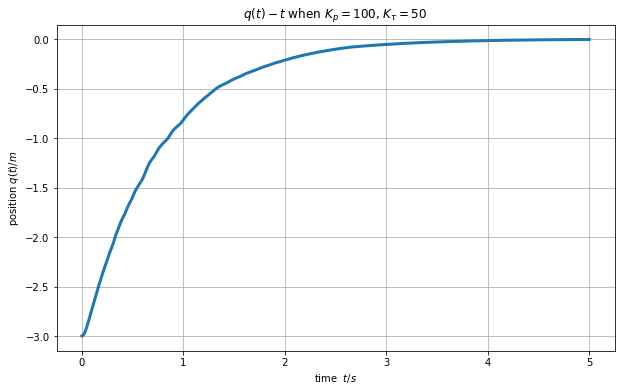

In [8]:
dt = 1e-5 #set the simulation time interval as 0.01ms
t = 5 #set the simulation end time as 5s
step = int(t/dt)

#set the control parameter
Kp = 100 #set100 as an example
Kt = 50 # set 50 as an example

#set the initial condition
q0 = -3
q_0 = 0
q__0 = 0
q = np.zeros(step)
q_ = np.zeros(step)
q__ = np.zeros(step)
q[0] = q0
q_[0] = q_0
q__[0] = q__0

#start simulation
for i in range(1,step):
    j = int(i*dt/tau)
    if j == 0:
        Q = Qt(q0 , q0 , Kp , Kt , tau)
        pass
    else:
        qj = q[int(j*tau/dt)]
        qj_1 = q[int((j-1)*tau/dt)]
        Q = Qt(qj , qj_1 , Kp , Kt , tau)
        pass
    CC = C*sign(q[i])
    a = (Q-CC)/m
    v = q_[i-1]
    x = q[i-1]
    q__[i] = a
    q_[i] = v + a*dt
    q[i] = x + v*dt + a*dt**2/2
    pass

#draw the picture
tt = np.arange(0 , t-dt , dt)
plt.figure(figsize=(10 , 6))
plt.plot(tt , q , linewidth = 3)
plt.grid('on')
plt.xlabel('time  $t/s$')
plt.ylabel('position $q(t)/m$')
plt.title(r'$q(t)-t$ when $K_p=$'+str(Kp)+r', $K_{\tau}=$'+str(Kt))
plt.show()

## 2.$K_p=1000 , K_\tau=50$

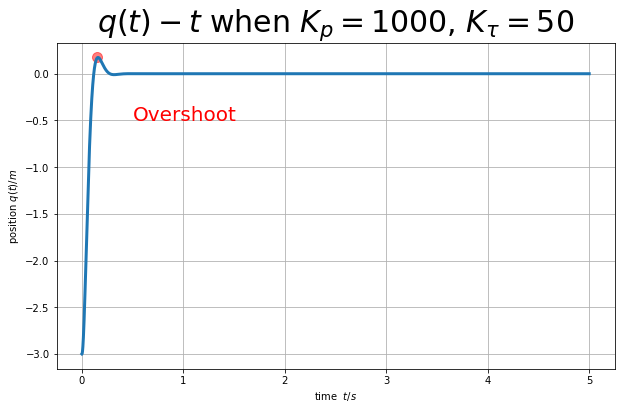

In [16]:
dt = 1e-5 #set the simulation time interval as 0.01ms
t = 5 #set the simulation end time as 5s
step = int(t/dt)

#set the control parameter
Kp = 1000 #set1000 as an example
Kt = 50 # set 50 as an example

#set the initial condition
q0 = -3
q_0 = 0
q__0 = 0
q = np.zeros(step)
q_ = np.zeros(step)
q__ = np.zeros(step)
q[0] = q0
q_[0] = q_0
q__[0] = q__0

#start simulation
for i in range(1,step):
    j = int(i*dt/tau)
    if j == 0:
        Q = Qt(q0 , q0 , Kp , Kt , tau)
        pass
    else:
        qj = q[int(j*tau/dt)]
        qj_1 = q[int((j-1)*tau/dt)]
        Q = Qt(qj , qj_1 , Kp , Kt , tau)
        pass
    CC = C*sign(q[i])
    a = (Q-CC)/m
    v = q_[i-1]
    x = q[i-1]
    q__[i] = a
    q_[i] = v + a*dt
    q[i] = x + v*dt + a*dt**2/2
    pass

#draw the picture
tt = np.arange(0 , t-dt , dt)
plt.figure(figsize=(10 , 6))
plt.plot(tt , q , linewidth = 3)
plt.grid('on')
plt.xlabel('time  $t/s$')
plt.ylabel('position $q(t)/m$')
plt.title(r'$q(t)-t$ when $K_p=$'+str(Kp)+r', $K_{\tau}=$'+str(Kt) , fontsize = 30)
plt.scatter(0.15 , q.max() , alpha = 0.5 , color = 'r' , s = 100)
plt.text(0.5 , -0.5 , 'Overshoot' , color = 'r' , fontsize = 20)
plt.show()

Ovviously we can see that——althougth it will get stable more quickly, but it will have a overshoot as a result of the increase of $K_p$.

## 3.$K_p=100 , K_\tau=100$

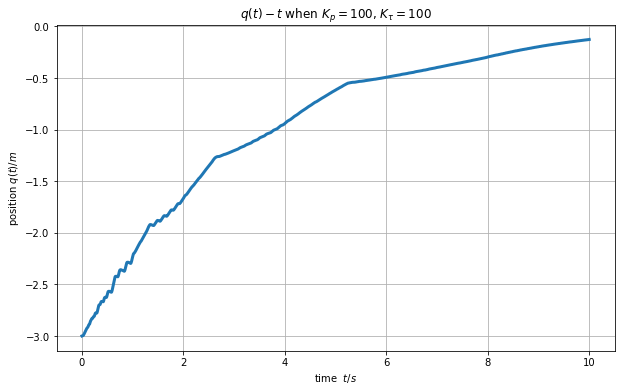

In [18]:
dt = 1e-5 #set the simulation time interval as 0.01ms
t = 10 #set the simulation end time as 10s
step = int(t/dt)

#set the control parameter
Kp = 100 #set100 as an example
Kt = 100 # set 100 as an example

#set the initial condition
q0 = -3
q_0 = 0
q__0 = 0
q = np.zeros(step)
q_ = np.zeros(step)
q__ = np.zeros(step)
q[0] = q0
q_[0] = q_0
q__[0] = q__0

#start simulation
for i in range(1,step):
    j = int(i*dt/tau)
    if j == 0:
        Q = Qt(q0 , q0 , Kp , Kt , tau)
        pass
    else:
        qj = q[int(j*tau/dt)]
        qj_1 = q[int((j-1)*tau/dt)]
        Q = Qt(qj , qj_1 , Kp , Kt , tau)
        pass
    CC = C*sign(q[i])
    a = (Q-CC)/m
    v = q_[i-1]
    x = q[i-1]
    q__[i] = a
    q_[i] = v + a*dt
    q[i] = x + v*dt + a*dt**2/2
    pass

#draw the picture
tt = np.arange(0 , t-dt , dt)
plt.figure(figsize=(10 , 6))
plt.plot(tt , q , linewidth = 3)
plt.grid('on')
plt.xlabel('time  $t/s$')
plt.ylabel('position $q(t)/m$')
plt.title(r'$q(t)-t$ when $K_p=$'+str(Kp)+r', $K_{\tau}=$'+str(Kt))
plt.show()

As can be seen in the picture, the increase of $K_\tau$ will result a longer time into stable condition. Even the system will lose stable condition when $K_\tau$ is too large.